# California house prices


Data:
https://www.kaggle.com/datasets/camnugent/california-housing-prices

## Loading the data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data
from sklearn.datasets import fetch_california_housing
dict_cali = fetch_california_housing()

In [3]:
dict_cali # trying to understand the dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Getting a "feeling of the data"

In [4]:
print(dict_cali.keys()) #print keys

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [7]:
# Initializing the dataframe
data = pd.DataFrame(dict_cali.data)

In [8]:
print(dict_cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
#Adding the feature names to the dataframe
data.columns = dict_cali.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Each record in the database describes a California suburb or town.

In [11]:
#Adding target variable to dataframe
data['PRICE'] = dict_cali.target
# Median value of owner-occupied homes in $1000s

In [12]:
#Check the shape of dataframe
data.shape

(20640, 9)

In [13]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [14]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [15]:
# Identifying the unique number of values in the dataset
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [16]:
# Check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [18]:
data[data.columns[1:5]].groupby("HouseAge").describe()

AveRooms                                                    \
            count      mean       std       min       25%       50%   
HouseAge                                                              
1.0           4.0  9.088091  7.603901  3.000000  4.900000  6.613682   
2.0          58.0  7.649087  2.854903  2.771930  6.050076  7.303911   
3.0          62.0  6.851805  2.700020  3.104575  5.705548  6.574626   
4.0         191.0  6.112610  1.731123  1.000000  5.200822  6.042193   
5.0         244.0  5.963211  1.989675  2.577181  4.887365  5.764803   
6.0         160.0  5.832246  1.579422  2.359155  4.726202  5.756011   
7.0         175.0  6.236576  2.673897  3.208398  5.077402  5.815487   
8.0         206.0  6.280481  3.610323  2.328820  4.814864  5.697376   
9.0         205.0  6.014117  2.149162  2.042050  4.997677  5.789557   
10.0        264.0  6.047608  2.944021  2.651515  4.870169  5.690197   
11.0        254.0  6.288396  4.147424  1.985337  4.793241  5.610469   
12.0        238.0  5.766874  1.567227  1.465753  4.765703  5.646934   
13.0        302.0  6.225630  3.662668  2.476480  4.867788  5.821876   
14.0        412.0  6.101843  3.492809  2.342071  4.876688  5.763463   
15.0        512.0  5.942703  2.229463  2.553571  4.925605  5.684057   
16.0        771.0  6.004060  3.111267  2.111111  4.836242  5.717338   
17.0        698.0  5.879533  3.113181  1.868074  4.702374  5.531456   
18.0        570.0  5.708517  1.990672  2.090426  4.686383  5.502383   
19.0        502.0  5.632239  3.213509  2.008734  4.438643  5.371266   
20.0        465.0  5.466440  1.820472  1.130435  4.422713  5.340206   
21.0        446.0  5.536552  2.262576  1.629630  4.489573  5.261684   
22.0        399.0  5.661284  3.009185  1.885057  4.490612  5.297491   
23.0        448.0  5.584120  2.537317  2.172494  4.614327  5.432434   
24.0        478.0  5.404322  1.694922  1.708995  4.403258  5.254719   
25.0        566.0  5.542334  2.806094  1.654440  4.351636  5.282061   
26.0        619.0  5.547365  1.973978  1.598131  4.505026  5.435052   
27.0        488.0  5.345399  2.261231  1.875000  4.292515  5.144382   
28.0        471.0  5.213263  1.754340  1.972906  4.264827  5.121569   
29.0        461.0  5.215443  1.686726  2.373272  4.298246  5.067485   
30.0        476.0  5.086314  1.675216  2.247525  4.145854  4.989915   
31.0        458.0  4.962658  1.211514  2.338957  4.175649  4.845088   
32.0        565.0  5.174086  1.133700  2.225564  4.370253  5.103448   
33.0        615.0  5.443103  5.664424  0.888889  4.426854  5.125641   
34.0        689.0  5.463408  5.040567  2.263400  4.530738  5.274376   
35.0        824.0  5.201818  0.991680  2.056890  4.546949  5.271429   
36.0        862.0  5.252212  1.242524  1.130435  4.602374  5.291822   
37.0        537.0  5.099511  1.403460  1.411290  4.327434  4.976119   
38.0        394.0  4.991169  1.223935  2.383333  4.272623  4.876085   
39.0        369.0  4.872036  1.225246  2.043478  4.085502  4.805009   
40.0        304.0  4.891881  1.132417  2.093750  4.136011  4.808371   
41.0        296.0  4.713015  0.987840  1.750814  4.017467  4.595409   
42.0        368.0  4.764322  1.039932  1.806122  4.142694  4.741710   
43.0        353.0  4.759272  0.982777  1.911826  4.099698  4.721875   
44.0        356.0  5.057172  1.527068  2.033019  4.368319  4.942308   
45.0        294.0  4.976640  0.915118  1.768025  4.457579  4.938931   
46.0        245.0  4.902913  1.154745  0.846154  4.295455  4.876777   
47.0        198.0  4.916969  0.979371  1.680774  4.321372  4.909798   
48.0        177.0  5.085865  1.189120  2.310559  4.401163  5.028698   
49.0        134.0  4.966750  0.973534  1.972644  4.305309  4.937338   
50.0        136.0  4.942963  1.128268  1.625514  4.199501  4.879128   
51.0         48.0  4.890285  1.189903  2.647295  4.055250  4.894028   
52.0       1273.0  5.100120  1.399734  1.260870  4.263502  4.952381   

                                AveBedrms            ...                       \
                75%   

In [19]:
data[data.columns[1:5]].groupby("HouseAge").count().mean()

AveRooms      396.923077
AveBedrms     396.923077
Population    396.923077
dtype: float64

In [20]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [ ]:
# Viewing the data statistics
print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

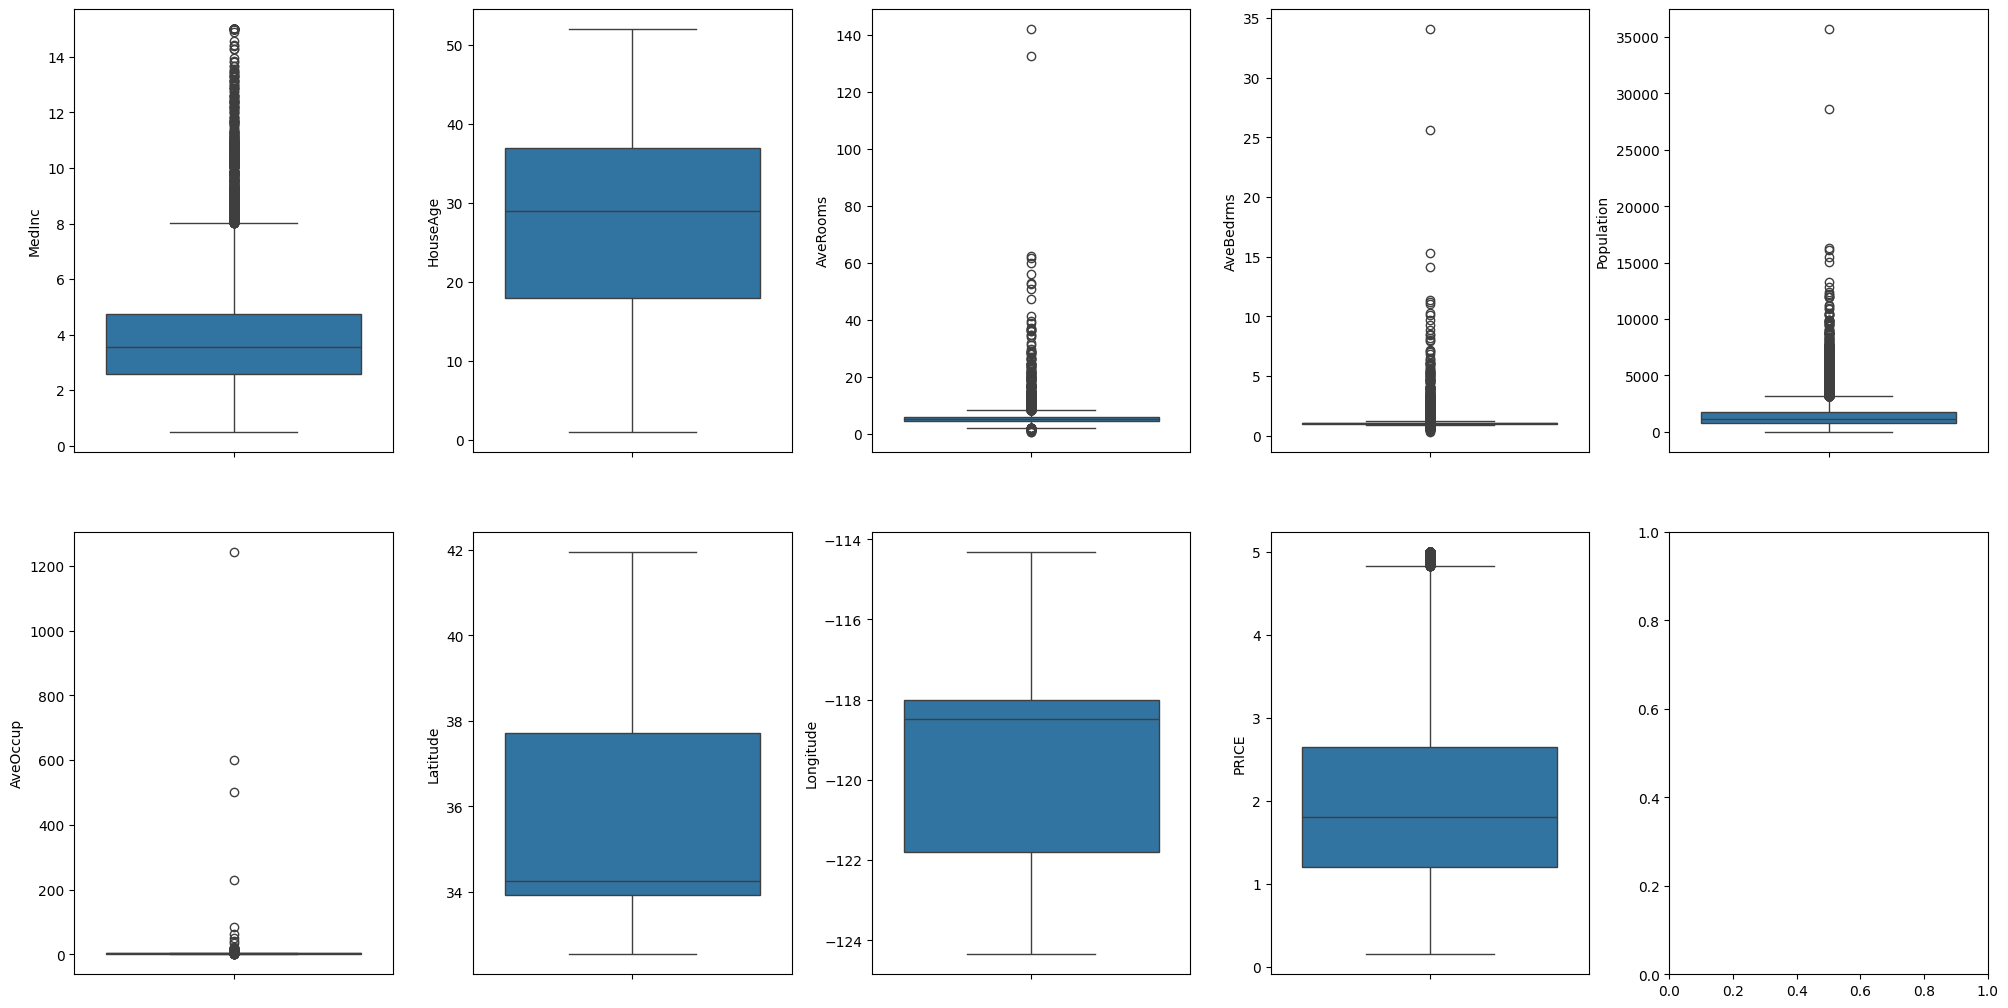

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Let's see the outliers percentage in every column.

In [22]:
    for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column MedInc outliers = 3.30%
Column HouseAge outliers = 0.00%
Column AveRooms outliers = 2.48%
Column AveBedrms outliers = 6.90%
Column Population outliers = 5.80%
Column AveOccup outliers = 3.44%
Column Latitude outliers = 0.00%
Column Longitude outliers = 0.00%
Column PRICE outliers = 5.19%


Let's see how the feature distributions look like

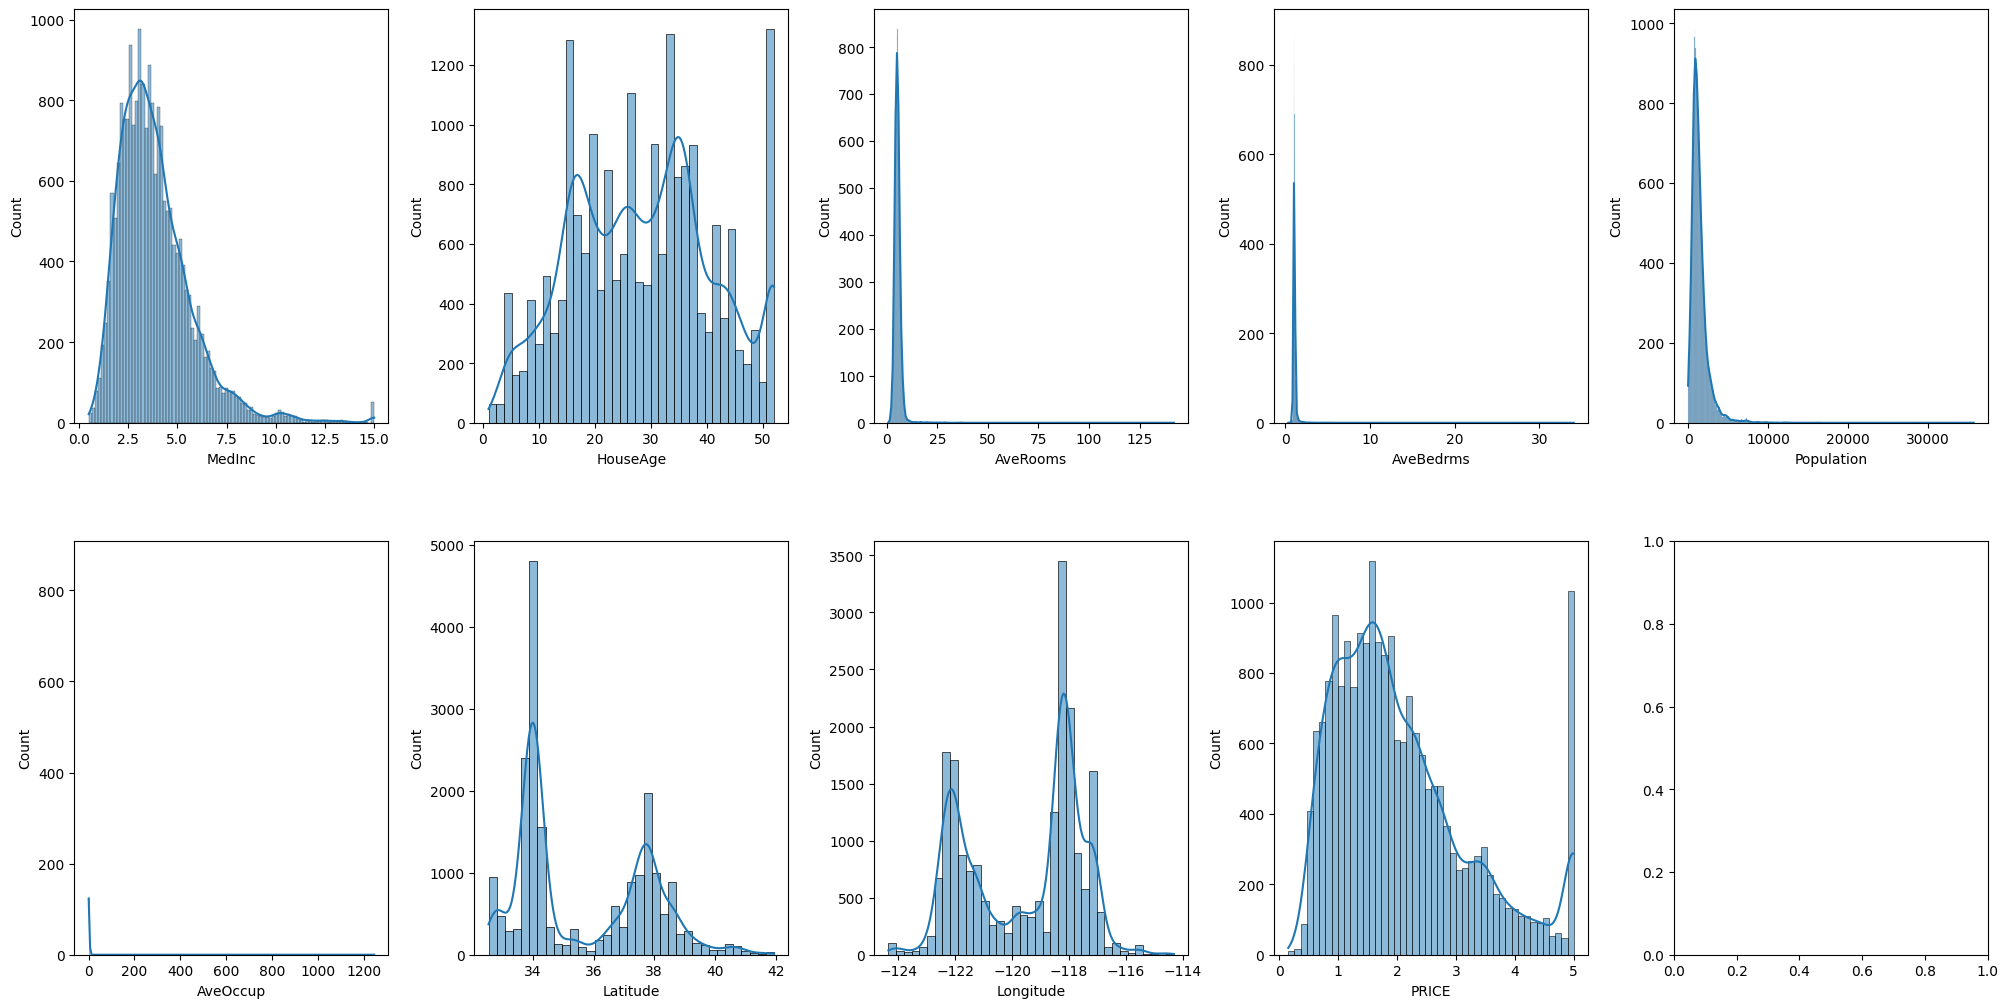

In [23]:
#import warnings
#warnings.filterwarnings('ignore')

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, kde=True, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [25]:
# Finding out the correlation between the features
corr = data.corr().abs()
corr.shape

(9, 9)

<Axes: >

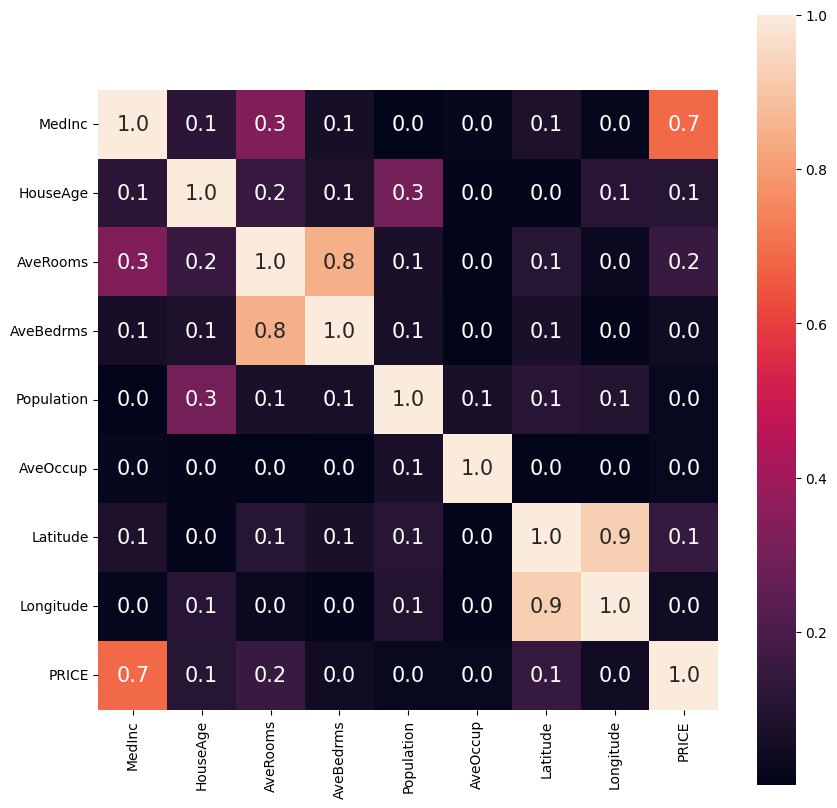

In [26]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
#sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

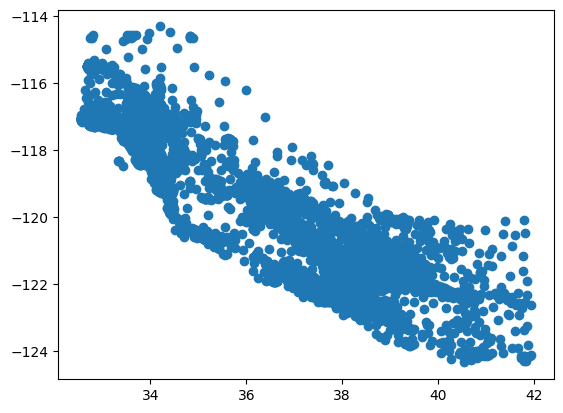

In [30]:
data[["Latitude", "Longitude"]].describe()
plt.scatter(data.Latitude, data.Longitude)

Plot columns with a correlation score above 0.5 with PRICE against PRICE

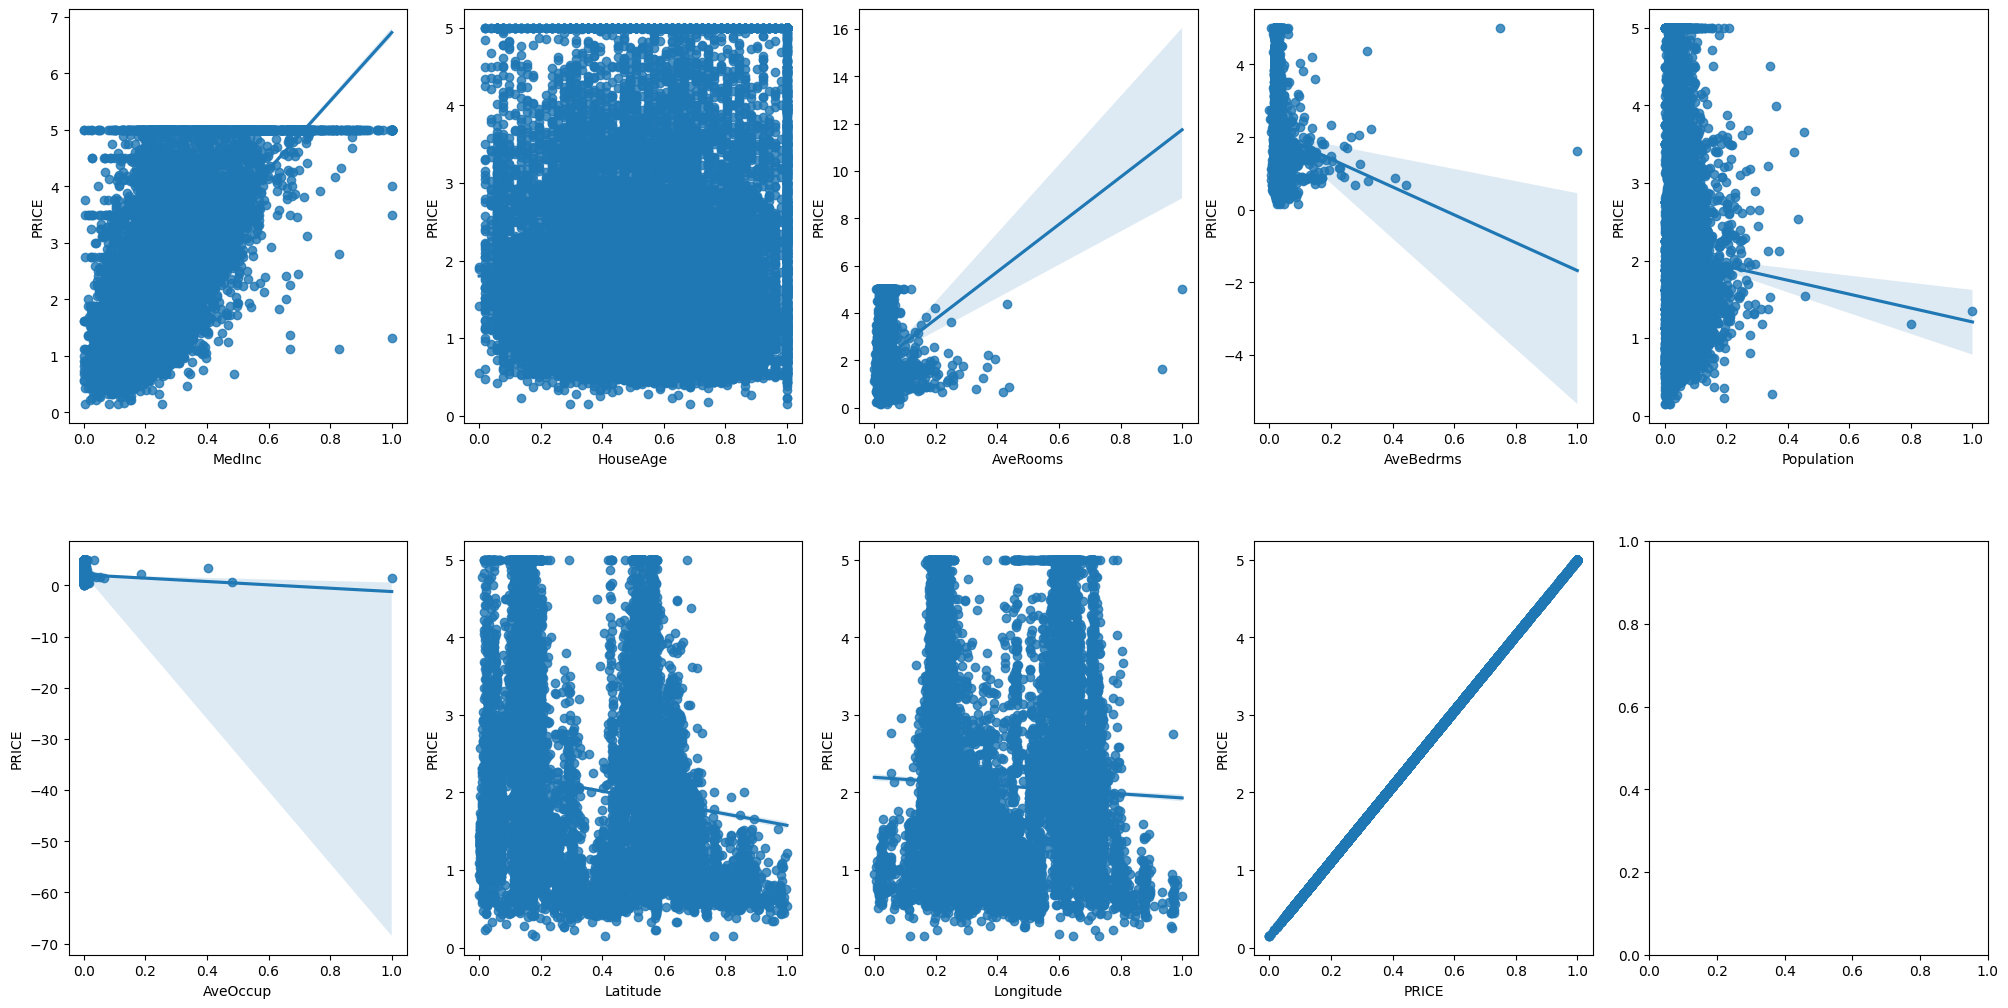

In [31]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = data.columns
x = data.loc[:,column_sels]
y = data['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


## Prediction using the data (a first example to machine learning applications)

In [ ]:
# Splitting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

### Linear regression

#### Training the model

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

-36.92588429884586

In [ ]:
#Converting the coefficient values to a dataframe
coeffs = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffs = coeffs.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffs

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6081901093734017
Adjusted R^2: 0.6079730251483852
MAE: 0.5319076620403788
MSE: 0.5258454910434389
RMSE: 0.7251520468449627


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.






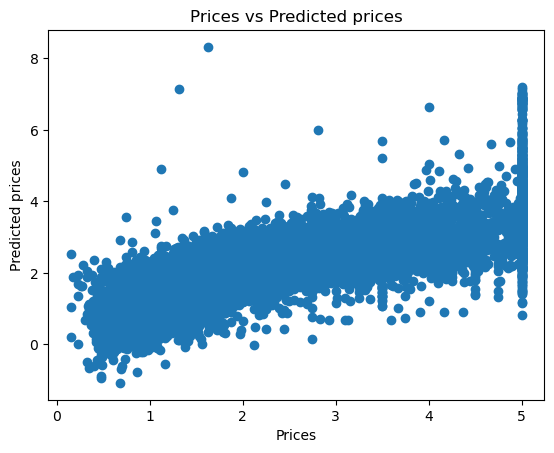

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

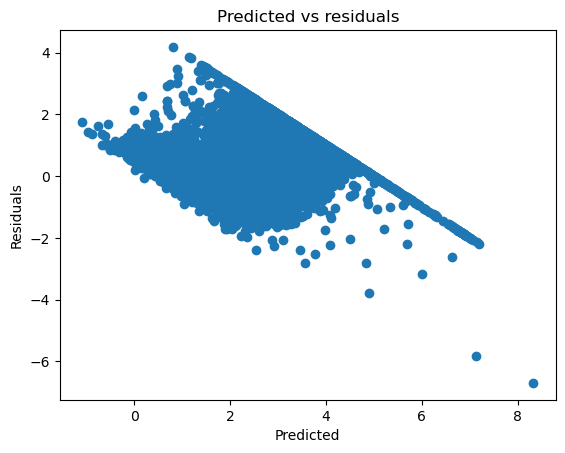

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

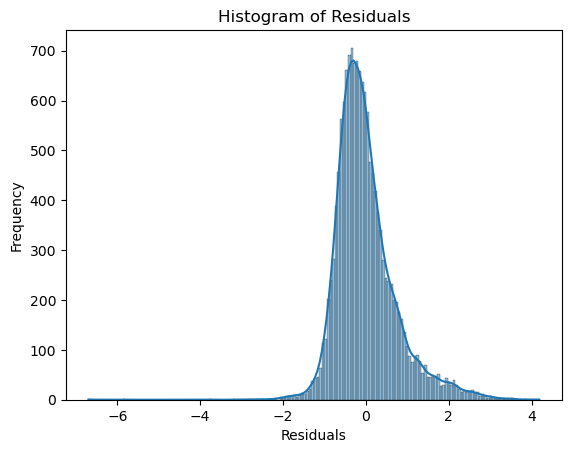

In [ ]:
# Checking Normality of errors
sns.histplot(y_train-y_pred, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6010291338754372
Adjusted R^2: 0.6005129173253811
MAE: 0.5303872778945681
MSE: 0.5213468821374596
RMSE: 0.7220435458734187


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

### Random Forest Regressor

#### Train the model

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9734678245277432
Adjusted R^2: 0.9734531242435284
MAE: 0.1229456443452385
MSE: 0.03560865913146623
RMSE: 0.1887025678984423


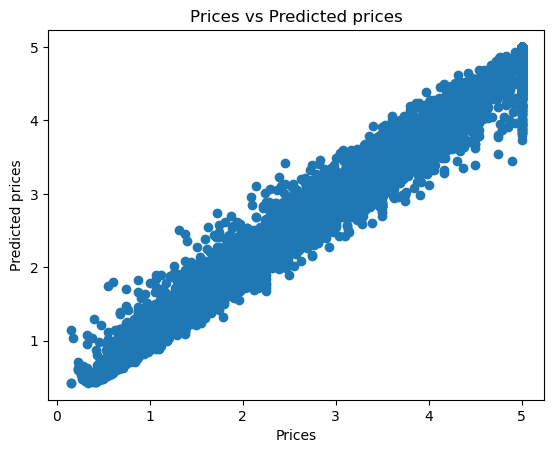

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

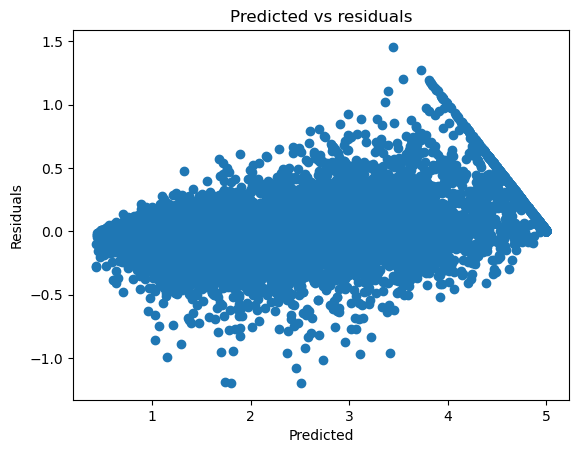

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.802235042264009
Adjusted R^2: 0.8019791600608894
MAE: 0.33285068154069786
MSE: 0.25842524571584946
RMSE: 0.5083554324641859


### SVM Regressor

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets
reg.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7478602270878774
Adjusted R^2: 0.7477205277885286
MAE: 0.3847450385143313
MSE: 0.33839513976157803
RMSE: 0.5817174054139845


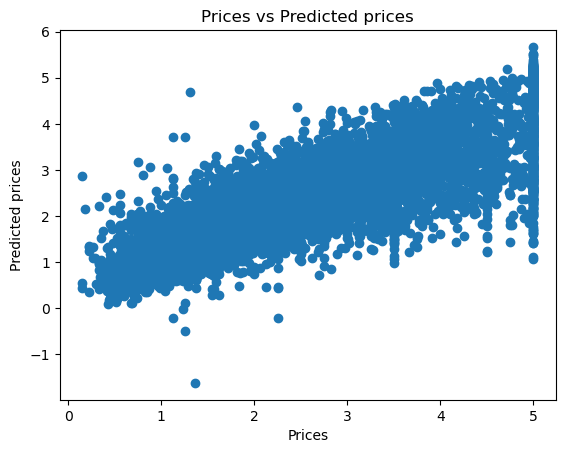

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

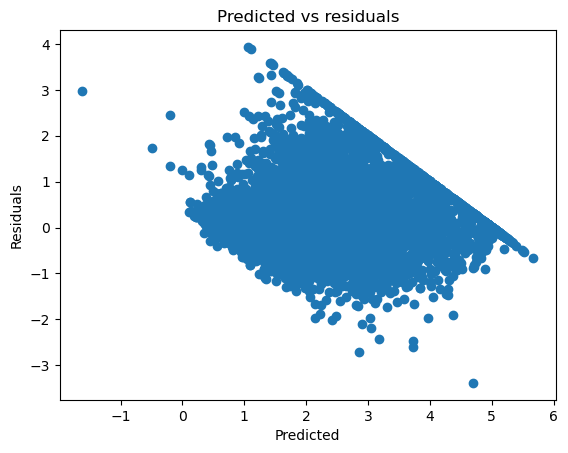

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.802235042264009
Adjusted R^2: 0.8019791600608894
MAE: 0.33285068154069786
MSE: 0.25842524571584946
RMSE: 0.5083554324641859


# Evaluation and comparison of all the models

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,80.223504
2,Support Vector Machines,80.223504
0,Linear Regression,60.102913
